In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [51]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [52]:
#DONE*******************************************
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [56]:
Station_columns = inspector.get_columns('station')
for column in Station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [57]:
# View all of the classes that automap found
Msr_columns = inspector.get_columns('measurement')
for column in Msr_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
# Save references to each table
Msr = Base.classes.measurement
Station = Base.classes.station

In [63]:
M_first_row = session.query(Msr).first()
M_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb6800ae820>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [61]:
S_first_row = session.query(Station).first()
S_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb6780e85e0>,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
new_date= session.query(Msr.date).order_by(Msr.date.desc()).first()

('2017-08-23',)

Query Date:  2016-08-23


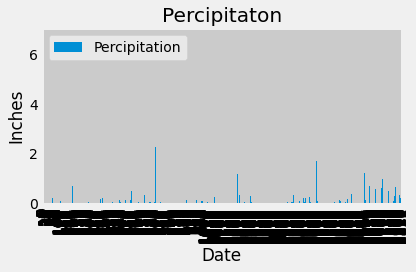

In [116]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


# Perform a query to retrieve the data and precipitation scores
date = dt.datetime(2016, 8, 23)
year_perc= session.query(Msr.date, Msr.prcp).\
    filter(Msr.date > date).all()
year_perc

# # Save the query results as a Pandas DataFrame and set the index to the date column
rows = [{"Date": result[0], "Percipitation": result[1]} for result in year_perc]
rows
DF= pd.DataFrame(rows)
DF

# # Sort the dataframe by date
DF.sort_values(by='Date').set_index("Date", inplace = True)


# # Use Pandas Plotting with Matplotlib to plot the data
DF.plot.bar(xlabel='Date',ylabel='Inches', title = "Percipitaton")
#plt.figure(figsize=(10, 6))

plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()



In [109]:
# Use Pandas to calculate the summary statistics for the precipitation data

DF.agg()

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()

for record in same_sporder:
    (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()

### sqlalchemy filter between dates:
https://www.codegrepper.com/code-examples/python/sqlalchemy+filter+between+dates